In [1]:
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
)  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -u '/content/drive/MyDrive/00SoftLab/ass2/Dataset C.zip' -d /content/drive/MyDrive/00SoftLab/ass2

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19300.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19301.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19302.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19303.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19304.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19305.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19306.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19307.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19308.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19309.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19310.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/training-c/c19311.png  
  inflating: /content/drive/MyDrive/00SoftLab/ass

In [4]:
class CustomDatasetmine(Dataset):
  def __init__(self, csv_file, root_dir, transform=None):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform
  def __len__(self):
    return len(self.annotations)
  def __getitem__(self, index):
    img_path = os.path.join(self.root_dir, self.annotations.iloc[index,0])
    image= io.imread(img_path)
    y_label = torch.tensor(int(self.annotations.iloc[index, 3]))

    if self.transform:
      image=self.transform(image)
    return (image, y_label)

In [5]:
data = CustomDatasetmine("/content/drive/MyDrive/00SoftLab/ass2/training-c.csv","/content/drive/MyDrive/00SoftLab/ass2/training-c", transforms.Compose([transforms.ToPILImage(), transforms.Resize(size=(32, 32)), transforms.ToTensor()]))
train_set, test_set = torch.utils.data.random_split(data,[19438,4860])

In [6]:
data.__len__()

24298

In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [8]:
# Hyperparameters
batch_size = 20
num_iters = 20000
input_dim = 32*32 # num_features = 784
num_hidden = 200
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3018109798431396. Accuracy: 10.0
Iteration: 1000. Loss: 2.3048489093780518. Accuracy: 9.691358024691358
Iteration: 1500. Loss: 2.300884246826172. Accuracy: 9.732510288065845
Iteration: 2000. Loss: 2.304460287094116. Accuracy: 10.185185185185185
Iteration: 2500. Loss: 2.300604820251465. Accuracy: 9.732510288065845
Iteration: 3000. Loss: 2.307979106903076. Accuracy: 9.732510288065845
Iteration: 3500. Loss: 2.30450701713562. Accuracy: 9.732510288065845
Iteration: 4000. Loss: 2.304356813430786. Accuracy: 9.691358024691358
Iteration: 4500. Loss: 2.2980518341064453. Accuracy: 9.732510288065845
Iteration: 5000. Loss: 2.3083243370056152. Accuracy: 9.691358024691358
Iteration: 5500. Loss: 2.3078055381774902. Accuracy: 9.732510288065845
Iteration: 6000. Loss: 2.3085315227508545. Accuracy: 9.732510288065845
Iteration: 6500. Loss: 2.307429313659668. Accuracy: 9.732510288065845
Iteration: 7000. Loss: 2.3011891841888428. Accuracy: 9.732510288065845
Iteration: 7500. Loss: 2.30

[2.3018109798431396, 2.3048489093780518, 2.300884246826172, 2.304460287094116, 2.300604820251465, 2.307979106903076, 2.30450701713562, 2.304356813430786, 2.2980518341064453, 2.3083243370056152, 2.3078055381774902, 2.3085315227508545, 2.307429313659668, 2.3011891841888428, 2.3033947944641113, 2.3033387660980225, 2.2987282276153564, 2.302884578704834, 2.299572706222534, 2.305198907852173, 2.3051230907440186, 2.3062632083892822, 2.3010659217834473, 2.304002285003662, 2.3070554733276367, 2.302046537399292, 2.3027844429016113, 2.297065258026123, 2.303877592086792, 2.295577049255371, 2.296055316925049, 2.3113627433776855, 2.303821325302124, 2.301525115966797, 2.303683042526245, 2.300511360168457, 2.3017470836639404, 2.3023171424865723]


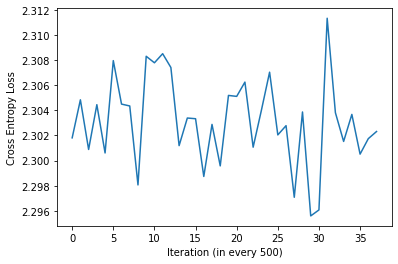

In [9]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [10]:
# Hyperparameters
batch_size = 80
num_iters = 80000
input_dim = 32*32 # num_features = 784
num_hidden = 500
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3031702041625977. Accuracy: 9.732510288065845
Iteration: 1000. Loss: 2.30314302444458. Accuracy: 9.732510288065845
Iteration: 1500. Loss: 2.301146984100342. Accuracy: 9.691358024691358
Iteration: 2000. Loss: 2.3005361557006836. Accuracy: 9.691358024691358
Iteration: 2500. Loss: 2.302433490753174. Accuracy: 9.691358024691358
Iteration: 3000. Loss: 2.3012337684631348. Accuracy: 10.102880658436215
Iteration: 3500. Loss: 2.3050074577331543. Accuracy: 9.691358024691358
Iteration: 4000. Loss: 2.3026487827301025. Accuracy: 9.691358024691358
Iteration: 4500. Loss: 2.3009114265441895. Accuracy: 10.102880658436215
Iteration: 5000. Loss: 2.302234172821045. Accuracy: 10.102880658436215
Iteration: 5500. Loss: 2.301805257797241. Accuracy: 9.732510288065845
Iteration: 6000. Loss: 2.3027801513671875. Accuracy: 9.732510288065845
Iteration: 6500. Loss: 2.304003953933716. Accuracy: 9.732510288065845
Iteration: 7000. Loss: 2.3031136989593506. Accuracy: 12.05761316872428
Iteration: 

[2.3031702041625977, 2.30314302444458, 2.301146984100342, 2.3005361557006836, 2.302433490753174, 2.3012337684631348, 2.3050074577331543, 2.3026487827301025, 2.3009114265441895, 2.302234172821045, 2.301805257797241, 2.3027801513671875, 2.304003953933716, 2.3031136989593506, 2.304097890853882, 2.3040900230407715, 2.3029651641845703, 2.3027970790863037, 2.3013253211975098, 2.302197217941284, 2.3009397983551025, 2.3005833625793457, 2.3019216060638428, 2.305691957473755, 2.3050644397735596, 2.301271915435791, 2.3034234046936035, 2.3019511699676514, 2.3018205165863037, 2.3019635677337646, 2.3025355339050293, 2.3018085956573486, 2.303701877593994, 2.3021607398986816, 2.3007819652557373, 2.3008224964141846, 2.3006317615509033, 2.302572250366211, 2.301670551300049, 2.303403615951538, 2.3043761253356934, 2.3018288612365723, 2.3020286560058594, 2.3005406856536865, 2.3019275665283203, 2.3031764030456543, 2.300727605819702, 2.3013617992401123, 2.302462339401245, 2.302061080932617, 2.302091836929321

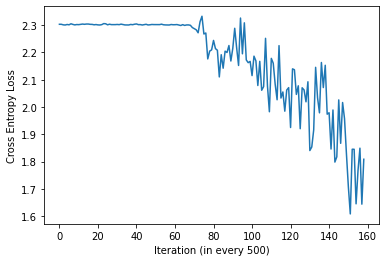

In [11]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()